In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import seaborn as sns
sns.set_theme(style = "darkgrid")

init_notebook_mode(connected=True)
%matplotlib inline

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

import pickle

In [ ]:
# This code will unzip the specified dataset in Colab.

# Import the necessary libraries.
import zipfile
import os

# Specify the path to the dataset file.
dataset_file = '/content/Loan Prediction dataset (2).zip'

# Extract the files from the ZIP archive.
with zipfile.ZipFile(dataset_file) as zip_ref:
  zip_ref.extractall()

# Print a message indicating that the dataset has been unzipped.
print('Dataset unzipped.')

Dataset unzipped.


In [ ]:
df = pd.read_csv("/content/Loan Prediction dataset/Training Data.csv")
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
rows, columns = df.shape
print('Rows:', rows)
print('Columns:', columns)

Rows: 252000
Columns: 13


In [ ]:
df.sample(5)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
32884,32885,4792641,40,15,single,rented,yes,Software_Developer,Kakinada,Andhra_Pradesh,13,10,0
69421,69422,8750833,50,19,single,rented,no,Engineer,Proddatur,Andhra_Pradesh,11,11,0
111041,111042,9840303,24,4,single,owned,no,Aviator,Gudivada,Andhra_Pradesh,4,11,0
104041,104042,3565306,68,0,single,rented,yes,Drafter,Giridih,Jharkhand,0,14,0
23769,23770,7186684,55,3,single,rented,yes,Statistician,Gwalior,Madhya_Pradesh,3,12,0


In [ ]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [ ]:
df.dtypes

Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [ ]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [ ]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [ ]:
# duplicate rows
print(df.duplicated().sum())

#drop duplicates
df.drop_duplicates(inplace=True)

0


In [ ]:
# Check if the duplicate rows are removed
print(df.duplicated().sum())

0


In [ ]:
df['Married/Single'].value_counts()

single     226272
married     25728
Name: Married/Single, dtype: int64

In [ ]:
df['House_Ownership'].value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

In [ ]:
df['Car_Ownership'].value_counts()

no     176000
yes     76000
Name: Car_Ownership, dtype: int64

In [ ]:
print(df['Profession'].nunique())
print(df['Profession'].unique())

51
['Mechanical_engineer' 'Software_Developer' 'Technical_writer'
 'Civil_servant' 'Librarian' 'Economist' 'Flight_attendant' 'Architect'
 'Designer' 'Physician' 'Financial_Analyst' 'Air_traffic_controller'
 'Politician' 'Police_officer' 'Artist' 'Surveyor' 'Design_Engineer'
 'Chemical_engineer' 'Hotel_Manager' 'Dentist' 'Comedian'
 'Biomedical_Engineer' 'Graphic_Designer' 'Computer_hardware_engineer'
 'Petroleum_Engineer' 'Secretary' 'Computer_operator'
 'Chartered_Accountant' 'Technician' 'Microbiologist' 'Fashion_Designer'
 'Aviator' 'Psychologist' 'Magistrate' 'Lawyer' 'Firefighter' 'Engineer'
 'Official' 'Analyst' 'Geologist' 'Drafter' 'Statistician' 'Web_designer'
 'Consultant' 'Chef' 'Army_officer' 'Surgeon' 'Scientist' 'Civil_engineer'
 'Industrial_Engineer' 'Technology_specialist']


In [ ]:
df['CITY'].nunique()

317

In [ ]:
df['CITY'].value_counts()

Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: CITY, Length: 317, dtype: int64

In [ ]:
df['STATE'].nunique()
df['STATE'].unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

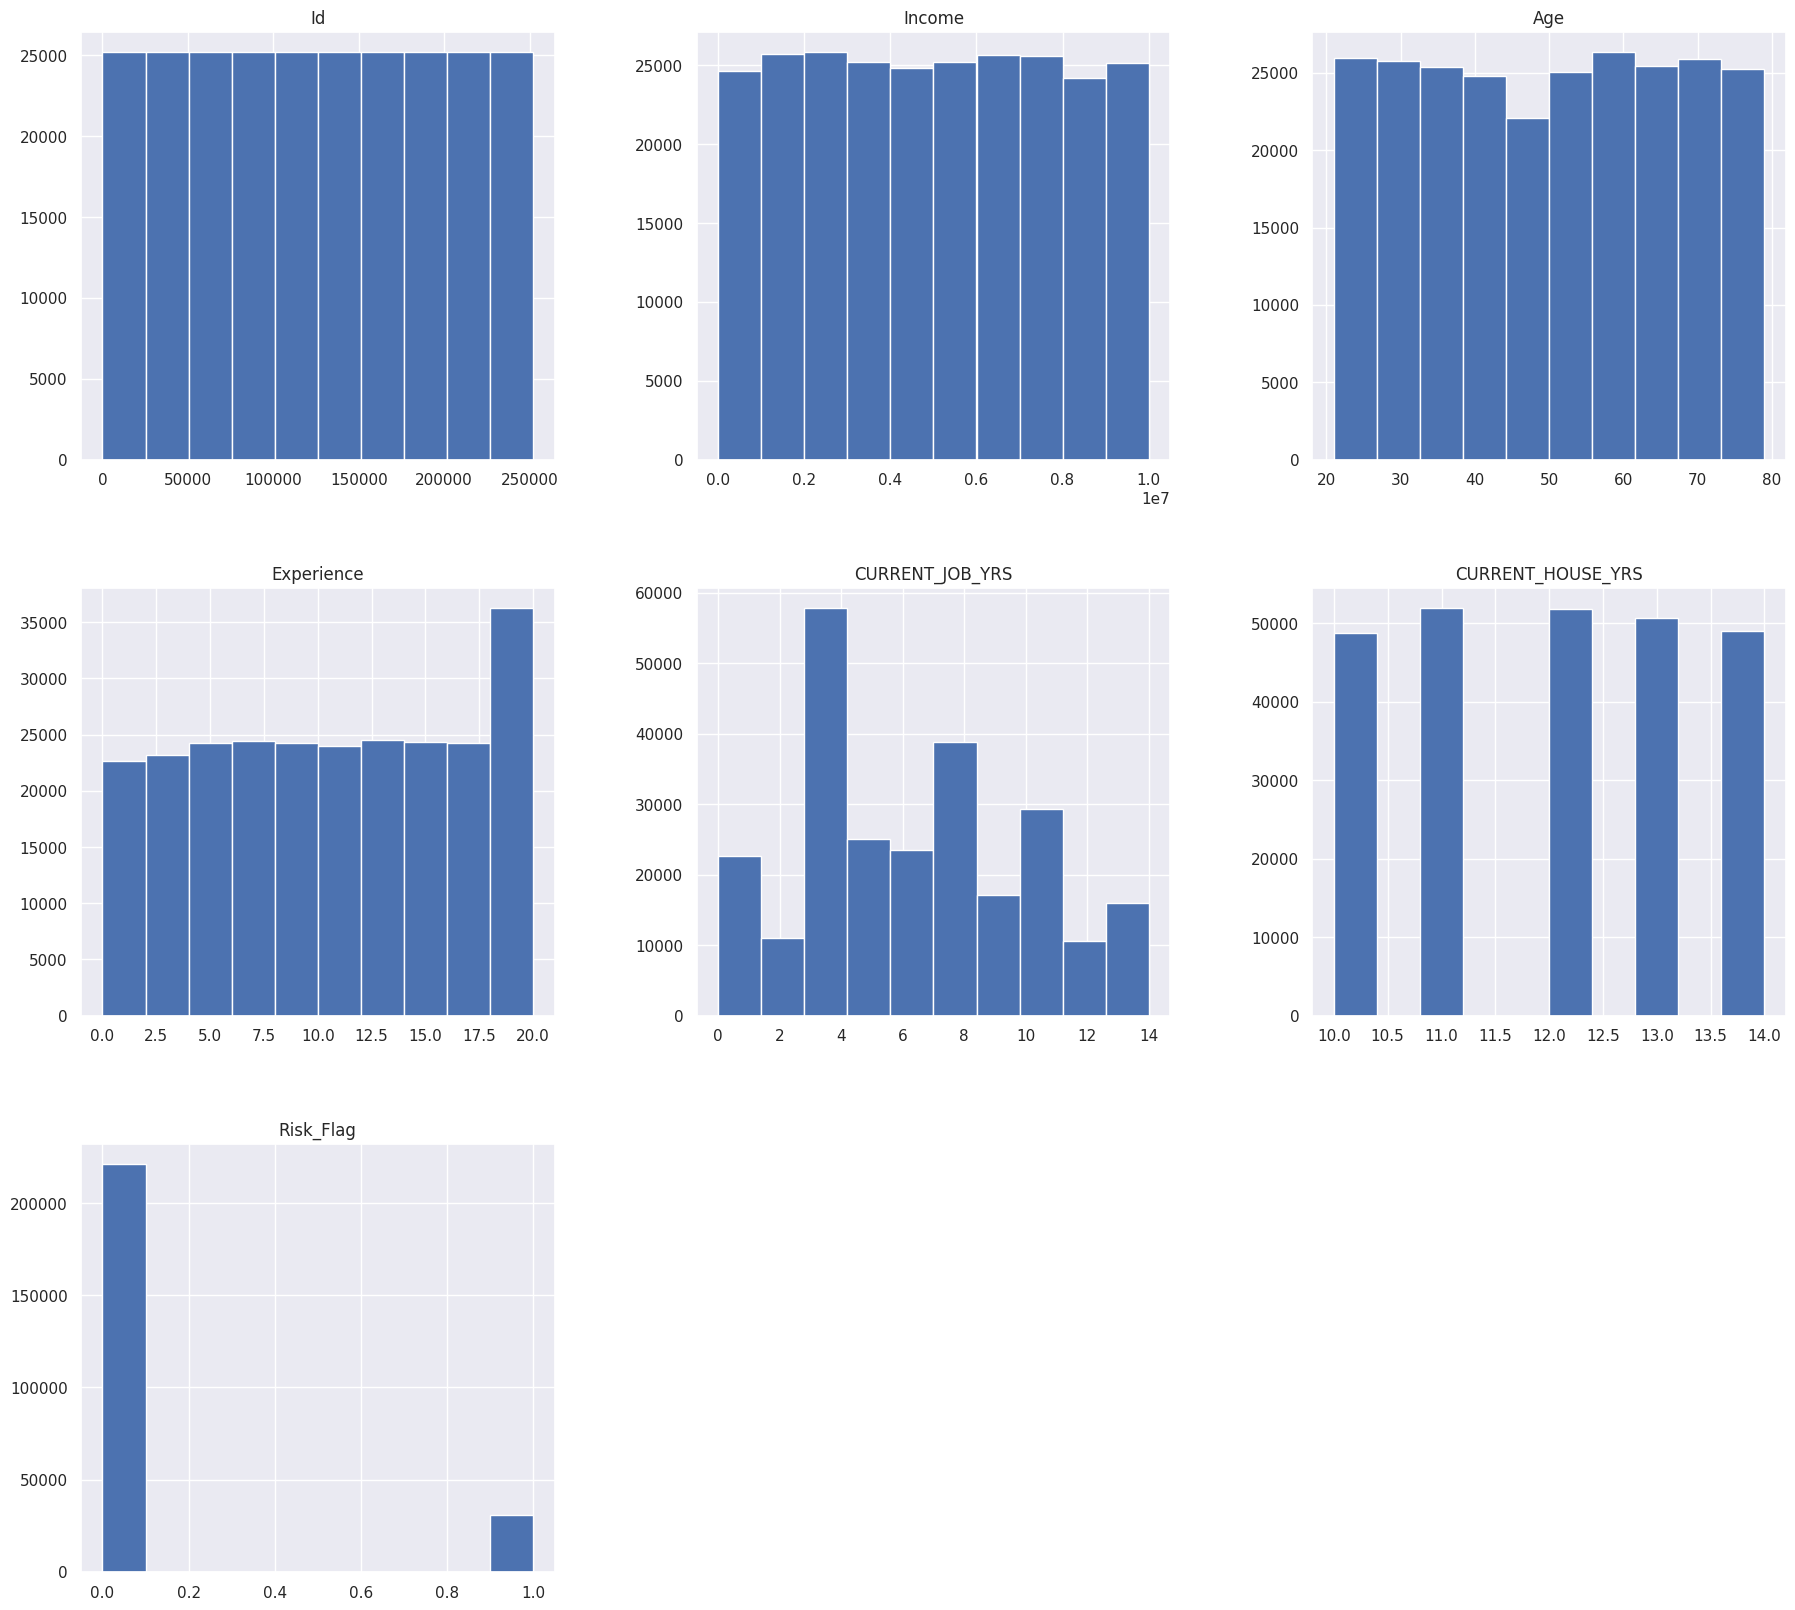

In [ ]:

df.hist( figsize = (22, 20) )
plt.show()

<Axes: xlabel='Married/Single', ylabel='count'>

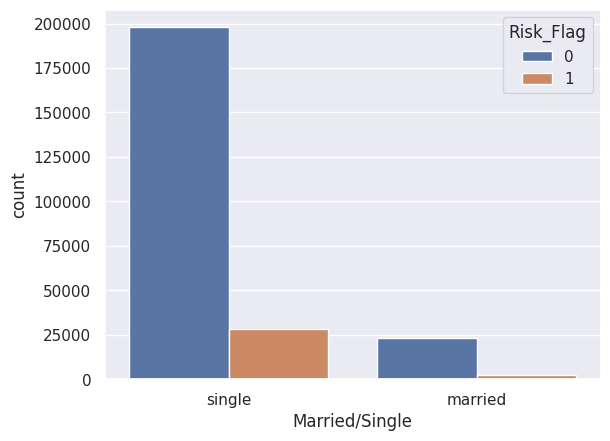

In [ ]:
sns.countplot(data = df, x = 'Married/Single', hue = 'Risk_Flag')

<Axes: xlabel='Risk_Flag', ylabel='count'>

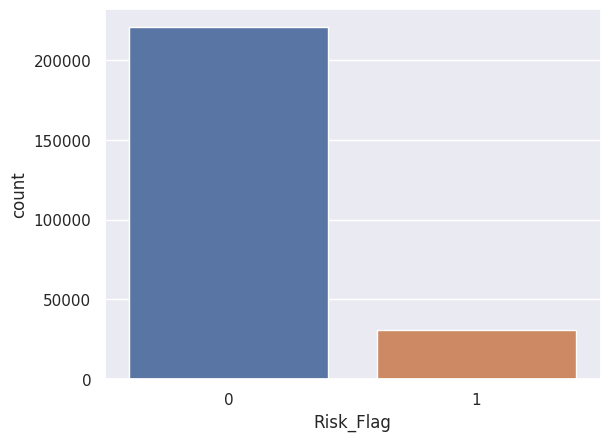

In [ ]:
sns.countplot(df, x = 'Risk_Flag')

<Axes: xlabel='count', ylabel='Profession'>

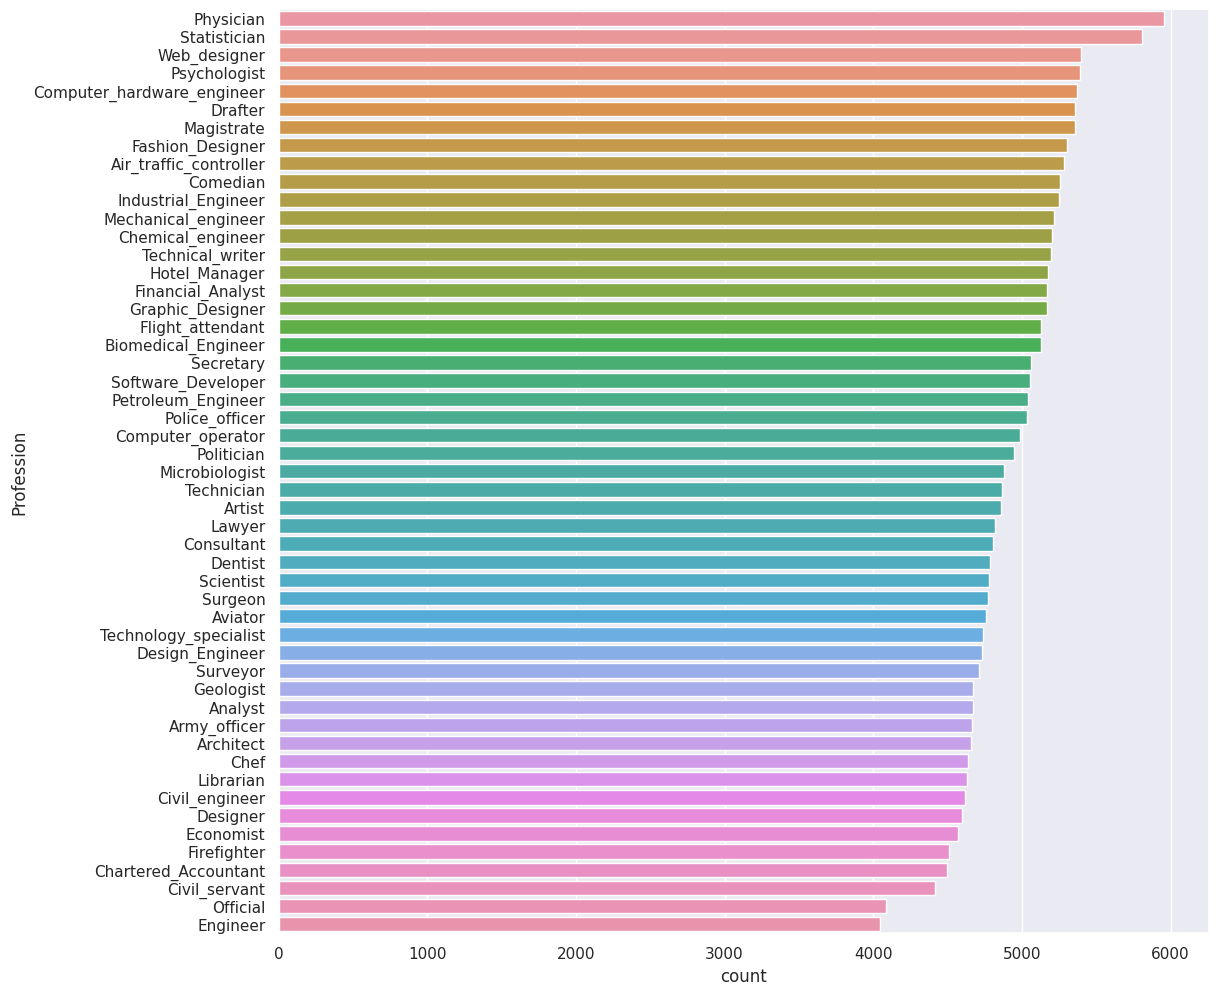

In [ ]:
plt.figure(figsize = (12,12))
sns.countplot(data=df, y='Profession', order=df['Profession'].value_counts().index)

In [ ]:
print(df['CITY'].unique())

['Rewa' 'Parbhani' 'Alappuzha' 'Bhubaneswar' 'Tiruchirappalli[10]'
 'Jalgaon' 'Tiruppur' 'Jamnagar' 'Kota[6]' 'Karimnagar' 'Hajipur[31]'
 'Adoni' 'Erode[17]' 'Kollam' 'Madurai' 'Anantapuram[24]' 'Kamarhati'
 'Bhusawal' 'Sirsa' 'Amaravati' 'Secunderabad' 'Ahmedabad' 'Ajmer'
 'Ongole' 'Miryalaguda' 'Ambattur' 'Indore' 'Pondicherry' 'Shimoga'
 'Chennai' 'Gulbarga' 'Khammam' 'Saharanpur' 'Gopalpur' 'Amravati' 'Udupi'
 'Howrah' 'Aurangabad[39]' 'Hospet' 'Shimla' 'Khandwa' 'Bidhannagar'
 'Bellary' 'Danapur' 'Purnia[26]' 'Bijapur' 'Patiala' 'Malda' 'Sagar'
 'Durgapur' 'Junagadh' 'Singrauli' 'Agartala' 'Thanjavur' 'Hindupur'
 'Naihati' 'North_Dumdum' 'Panchkula' 'Anantapur' 'Serampore' 'Bathinda'
 'Nadiad' 'Kanpur' 'Haridwar' 'Berhampur' 'Jamshedpur' 'Hyderabad' 'Bidar'
 'Kottayam' 'Solapur' 'Suryapet' 'Aizawl' 'Asansol' 'Deoghar' 'Eluru[25]'
 'Ulhasnagar' 'Aligarh' 'South_Dumdum' 'Berhampore' 'Gandhinagar'
 'Sonipat' 'Muzaffarpur' 'Raichur' 'Rajpur_Sonarpur' 'Ambarnath' 'Katihar'
 'Kozhikode'

In [ ]:
df['CITY'].replace('Tiruchirappalli[10]', 'Tiruchirappalli', inplace = True)
df['CITY'].replace('Kota[6]', 'Kota', inplace = True)
df['CITY'].replace('Hajipur[31]', 'Hajipur', inplace = True)
df['CITY'].replace('Erode[17]', 'Erode', inplace = True)
df['CITY'].replace('Guntur[13]', 'Guntur', inplace = True)
df['CITY'].replace('Mysore[7][8][9]', 'Mysore', inplace = True)
df['CITY'].replace('Chittoor[28]', 'Chittoor', inplace = True)
df['CITY'].replace('Bettiah[33]', 'Bettiah', inplace = True)
df['CITY'].replace('Sasaram[30]', 'Sasaram', inplace = True)
df['CITY'].replace('Ramagundam[27]', 'Ramagundam', inplace = True)
df['CITY'].replace('Buxar[37]', 'Buxar', inplace = True)
df['CITY'].replace('Visakhapatnam[4]', 'Visakhapatnam', inplace = True)
df['CITY'].replace('Nellore[14][15]', 'Nellore', inplace = True)
df['CITY'].replace('Dehri[30]', 'Dehri', inplace = True)
df['CITY'].replace('Jamalpur[36]', 'Jamalpur', inplace = True)
df['CITY'].replace('Saharsa[29]', 'Saharsa', inplace = True)
df['CITY'].replace('Rajahmundry[19][20]', 'Rajahmundry', inplace = True)
df['CITY'].replace('Jammu[16]', 'Jammu', inplace = True)
df['CITY'].replace('Kadapa[23]', 'Kadapa', inplace = True)
df['CITY'].replace('Kurnool[18]', 'Kurnool', inplace = True)
df['CITY'].replace('Tirupati[21][22]', 'Tirupati', inplace = True)
df['CITY'].replace('Jehanabad[38]', 'Jehanabad', inplace = True)
df['CITY'].replace('Warangal[11][12]', 'Warangal', inplace = True)
df['CITY'].replace('Motihari[34]', 'Motihari', inplace = True)
df['CITY'].replace('Siwan[32]', 'Siwan', inplace = True)
df['CITY'].replace('Eluru[25]', 'Eluru', inplace = True)
df['CITY'].replace('Purnia[26]', 'Purnia', inplace = True)
df['CITY'].replace('Aurangabad[39]', 'Aurangabad', inplace = True)
df['CITY'].replace('Anantapuram[24]', 'Anantapuram', inplace = True)

In [ ]:
print(df['STATE'])

0         Madhya_Pradesh
1            Maharashtra
2                 Kerala
3                 Odisha
4             Tamil_Nadu
               ...      
251995       West_Bengal
251996    Madhya_Pradesh
251997       Maharashtra
251998        Puducherry
251999        Tamil_Nadu
Name: STATE, Length: 252000, dtype: object


In [ ]:
df.drop('Id', axis=1, inplace=True)

In [ ]:
label_encoder = LabelEncoder()
cat_col = df.select_dtypes(include=['object'])
for i in cat_col:
  df[i] = label_encoder.fit_transform(df[i])

In [ ]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,250,13,3,13,0
1,7574516,40,10,1,2,0,43,226,14,9,13,0
2,3991815,66,4,0,2,0,47,8,12,4,10,0
3,6256451,41,2,1,2,1,43,53,17,2,12,1
4,5768871,47,11,1,2,0,11,295,22,3,14,1


In [ ]:
with open('label_encoder.pkl', 'wb') as le_file:
    pickle.dump(label_encoder, le_file)

In [ ]:
df.corr()['Risk_Flag']

Income              -0.003091
Age                 -0.021809
Experience          -0.034523
Married/Single       0.021092
House_Ownership      0.023622
Car_Ownership       -0.024036
Profession          -0.004900
CITY                 0.004543
STATE               -0.003401
CURRENT_JOB_YRS     -0.016942
CURRENT_HOUSE_YRS   -0.004375
Risk_Flag            1.000000
Name: Risk_Flag, dtype: float64

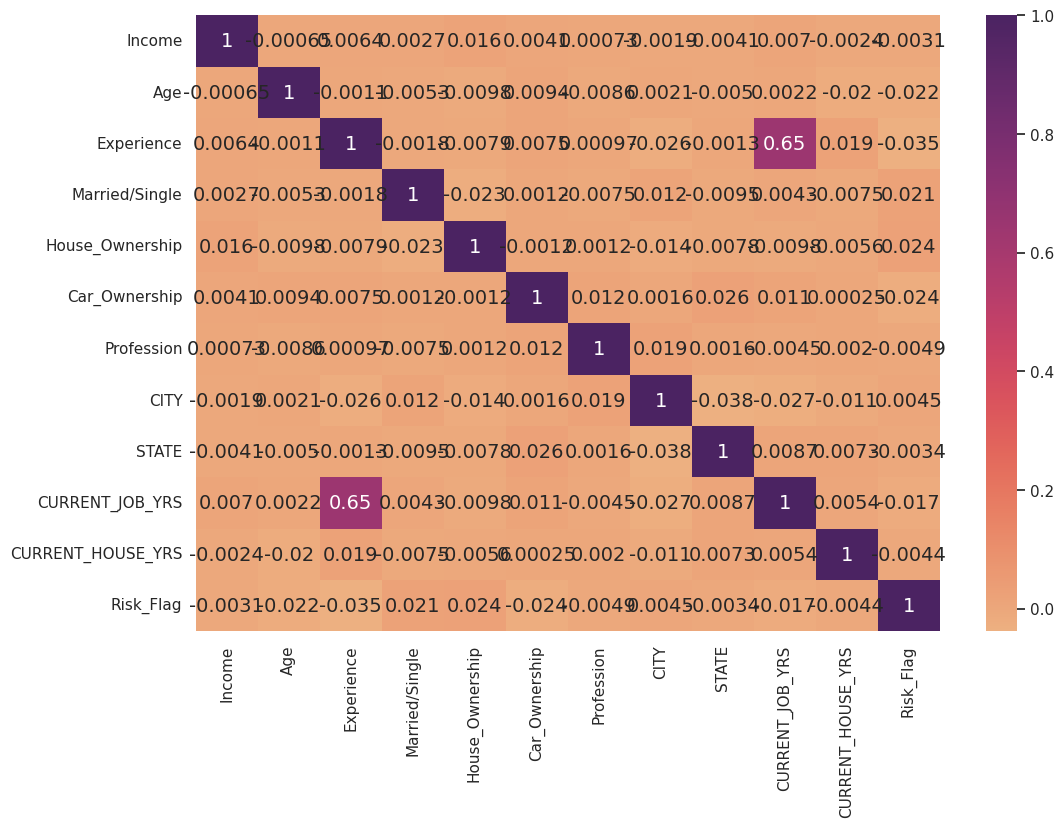

In [ ]:
fig, ax = plt.subplots( figsize = (12,8) )
corr_matrix = df.corr()
corr_heatmap = sns.heatmap( corr_matrix, cmap = "flare", annot=True, ax=ax, annot_kws={"size": 14})
plt.show()

In [ ]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 62.6 MB/s eta 0:00:00


In [ ]:
import sweetviz
my_report = sweetviz.analyze([df, "Train"], target_feat = "Risk_Flag")

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
my_report.show_html('Report.html')

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
x = df.drop("Risk_Flag", axis=1)
y = df["Risk_Flag"]

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, stratify = y,random_state = 7)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the StandardScaler object to the training data
scaler.fit(X_train)

# Transform the training and testing data using the StandardScaler object
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a SMOTE object
smote = SMOTE()

# Oversample the training data using SMOTE
X_train_smoted, y_train_smoted = smote.fit_resample(X_train_scaled, y_train)

# Split the oversampled training data into training and testing sets
X_train_smoted, X_test_smoted, y_train_smoted, y_test_smoted = train_test_split(X_train_smoted, y_train_smoted, test_size=0.25)

<Axes: xlabel='Married/Single', ylabel='count'>

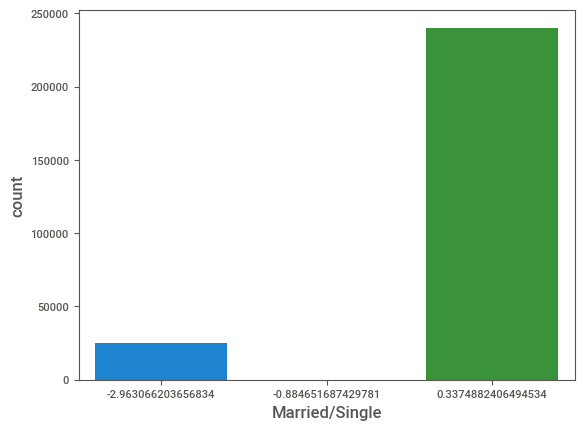

In [ ]:
import seaborn as sns
import pandas as pd

# Assuming X_train_smoted is your NumPy array
# Convert it to a pandas DataFrame
df = pd.DataFrame(X_train_smoted, columns=['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'City', 'State', 'Current_Job_Yrs', 'Current_House_Yrs'])

# Now use sns.countplot with the DataFrame
sns.countplot(data=df, x='Married/Single')


In [ ]:
with open('standard_scaler.pkl', 'wb') as ss_file:
    pickle.dump(scaler, ss_file)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_1 = RandomForestClassifier(criterion='gini', bootstrap = True, max_depth = 20, max_features = None, min_samples_split=10,n_estimators = 100, random_state=100)

clf_1.fit(X_train_smoted,y_train_smoted)
y_pred = clf_1.predict(X_test_smoted)
print("With Scaling: ",accuracy_score(y_test_smoted,y_pred))

print("-------------------------TEST SCORES-----------------------")
print(f"Recall: { recall_score(y_test_smoted, y_pred) }")
print(f"Precision: { precision_score(y_test_smoted, y_pred) }")
print(f"F1-Score: { f1_score(y_test_smoted, y_pred) }")
print(f"Accuracy score: { accuracy_score(y_test_smoted, y_pred) }")
print(f"AUC Score: { roc_auc_score(y_test_smoted, y_pred) }")

With Scaling:  0.9309744123436121
-------------------------TEST SCORES-----------------------
Recall: 0.9669937152416693
Precision: 0.9021005567740847
F1-Score: 0.9334206219312603
Accuracy score: 0.9309744123436121
AUC Score: 0.9309475006202914


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_2 = DecisionTreeClassifier(criterion='gini', max_depth=20, max_features=None, min_samples_split=5, random_state=100)

clf_2.fit(X_train_smoted, y_train_smoted)
y_pred = clf_2.predict(X_test_smoted)

print("With Scaling: ",accuracy_score(y_test_smoted,y_pred))

print("-------------------------TEST SCORES-----------------------")
print(f"Recall: { recall_score(y_test_smoted, y_pred) }")
print(f"Precision: { precision_score(y_test_smoted, y_pred) }")
print(f"F1-Score: { f1_score(y_test_smoted, y_pred) }")
print(f"Accuracy score: { accuracy_score(y_test_smoted, y_pred) }")
print(f"AUC Score: { roc_auc_score(y_test_smoted, y_pred) }")

With Scaling:  0.811373045858691
-------------------------TEST SCORES-----------------------
Recall: 0.8495501198173351
Precision: 0.7894913758692409
F1-Score: 0.8184203935404484
Accuracy score: 0.811373045858691
AUC Score: 0.8113445219626433


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create the classifier
clf_3 = XGBClassifier()

# Set parameters
clf_3.set_params(n_estimators=100, learning_rate=0.3, max_depth=20)

clf_3.fit(X_train_smoted, y_train_smoted)
y_pred = clf_3.predict(X_test_smoted)

print("With Scaling: ",accuracy_score(y_test_smoted,y_pred))

print("-------------------------TEST SCORES-----------------------")
print(f"Recall: { recall_score(y_test_smoted, y_pred) }")
print(f"Precision: { precision_score(y_test_smoted, y_pred) }")
print(f"F1-Score: { f1_score(y_test_smoted, y_pred) }")
print(f"Accuracy score: { accuracy_score(y_test_smoted, y_pred) }")
print(f"AUC Score: { roc_auc_score(y_test_smoted, y_pred) }")

With Scaling:  0.9409968100269225
-------------------------TEST SCORES-----------------------
Recall: 0.9712438395804133
Precision: 0.9159169402635058
F1-Score: 0.9427693658108406
Accuracy score: 0.9409968100269225
AUC Score: 0.9409742110417915


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf_4 = AdaBoostClassifier(n_estimators=200, learning_rate=0.1)

clf_4.fit(X_train_smoted, y_train_smoted)
y_pred = clf_4.predict(X_test_smoted)

print("With Scaling: ",accuracy_score(y_test_smoted,y_pred))

print("-------------------------TEST SCORES-----------------------")
print(f"Recall: { recall_score(y_test_smoted, y_pred) }")
print(f"Precision: { precision_score(y_test_smoted, y_pred) }")
print(f"F1-Score: { f1_score(y_test_smoted, y_pred) }")
print(f"Accuracy score: { accuracy_score(y_test_smoted, y_pred) }")
print(f"AUC Score: { roc_auc_score(y_test_smoted, y_pred) }")

With Scaling:  0.5691387072690663
-------------------------TEST SCORES-----------------------
Recall: 0.5861554460369851
Precision: 0.5672157686333705
F1-Score: 0.5765301017288343
Accuracy score: 0.5691387072690663
AUC Score: 0.569125993259391


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dct=DecisionTreeClassifier(max_depth=10)

clf_5 = AdaBoostClassifier(n_estimators=200, estimator=dct,learning_rate=0.2)

clf_5.fit(X_train_smoted, y_train_smoted)
y_pred = clf_5.predict(X_test_smoted)

print("With Scaling: ",accuracy_score(y_test_smoted,y_pred))

print("-------------------------TEST SCORES-----------------------")
print(f"Recall: { recall_score(y_test_smoted, y_pred) }")
print(f"Precision: { precision_score(y_test_smoted, y_pred) }")
print(f"F1-Score: { f1_score(y_test_smoted, y_pred) }")
print(f"Accuracy score: { accuracy_score(y_test_smoted, y_pred) }")
print(f"AUC Score: { roc_auc_score(y_test_smoted, y_pred) }")

With Scaling:  0.9382593154001041
-------------------------TEST SCORES-----------------------
Recall: 0.9744766469231813
Precision: 0.9087363494539782
F1-Score: 0.9404590478683946
Accuracy score: 0.9382593154001041
AUC Score: 0.9382322557202395


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

clf_6 = ExtraTreesClassifier(n_estimators=200, criterion='gini')

clf_6.fit(X_train_smoted, y_train_smoted)
y_pred = clf_6.predict(X_test_smoted)

print("With Scaling: ",accuracy_score(y_test_smoted,y_pred))

print("-------------------------TEST SCORES-----------------------")
print(f"Recall: { recall_score(y_test_smoted, y_pred) }")
print(f"Precision: { precision_score(y_test_smoted, y_pred) }")
print(f"F1-Score: { f1_score(y_test_smoted, y_pred) }")
print(f"Accuracy score: { accuracy_score(y_test_smoted, y_pred) }")
print(f"AUC Score: { roc_auc_score(y_test_smoted, y_pred) }")

With Scaling:  0.9501821225764123
-------------------------TEST SCORES-----------------------
Recall: 0.9933987430483339
Precision: 0.9144296000332959
F1-Score: 0.9522798196948683
Accuracy score: 0.9501821225764123
AUC Score: 0.9501498333970161


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf_7 = GradientBoostingClassifier(n_estimators=100, max_depth=10, learning_rate = 0.1)

clf_7.fit(X_train_smoted, y_train_smoted)
y_pred = clf_7.predict(X_test_smoted)

print("With Scaling: ",accuracy_score(y_test_smoted,y_pred))

print("-------------------------TEST SCORES-----------------------")
print(f"Recall: { recall_score(y_test_smoted, y_pred) }")
print(f"Precision: { precision_score(y_test_smoted, y_pred) }")
print(f"F1-Score: { f1_score(y_test_smoted, y_pred) }")
print(f"Accuracy score: { accuracy_score(y_test_smoted, y_pred) }")
print(f"AUC Score: { roc_auc_score(y_test_smoted, y_pred) }")

With Scaling:  0.9357819958824461
-------------------------TEST SCORES-----------------------
Recall: 0.9658181489352082
Precision: 0.9111694072983982
F1-Score: 0.9376982254365075
Accuracy score: 0.9357819958824461
AUC Score: 0.9357595544531141


In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00


In [ ]:
import catboost as cb

clf_8 = cb.CatBoostClassifier(n_estimators=100, max_depth=10)
clf_8.fit(X_train_smoted, y_train_smoted)
y_pred = clf_8.predict(X_test_smoted)

print()
print("With Scaling: ",accuracy_score(y_test_smoted,y_pred))

print("-------------------------TEST SCORES-----------------------")
print(f"Recall: { recall_score(y_test_smoted, y_pred) }")
print(f"Precision: { precision_score(y_test_smoted, y_pred) }")
print(f"F1-Score: { f1_score(y_test_smoted, y_pred) }")
print(f"Accuracy score: { accuracy_score(y_test_smoted, y_pred) }")
print(f"AUC Score: { roc_auc_score(y_test_smoted, y_pred) }")

Learning rate set to 0.5
0:	learn: 0.6719291	total: 245ms	remaining: 24.2s
1:	learn: 0.6584056	total: 417ms	remaining: 20.4s
2:	learn: 0.6458393	total: 628ms	remaining: 20.3s
3:	learn: 0.6347353	total: 819ms	remaining: 19.7s
4:	learn: 0.6267605	total: 1s	remaining: 19.1s
5:	learn: 0.6074611	total: 1.23s	remaining: 19.2s
6:	learn: 0.5985851	total: 1.43s	remaining: 19s
7:	learn: 0.5852548	total: 1.64s	remaining: 18.9s
8:	learn: 0.5756017	total: 1.87s	remaining: 18.9s
9:	learn: 0.5675785	total: 2.11s	remaining: 19s
10:	learn: 0.5582128	total: 2.41s	remaining: 19.5s
11:	learn: 0.5522029	total: 2.72s	remaining: 19.9s
12:	learn: 0.5433550	total: 2.93s	remaining: 19.6s
13:	learn: 0.5329399	total: 3.13s	remaining: 19.2s
14:	learn: 0.5242942	total: 3.35s	remaining: 19s
15:	learn: 0.5136677	total: 3.53s	remaining: 18.5s
16:	learn: 0.5079006	total: 3.72s	remaining: 18.1s
17:	learn: 0.4998542	total: 3.89s	remaining: 17.7s
18:	learn: 0.4938946	total: 4.04s	remaining: 17.2s
19:	learn: 0.4881520	tota

In [ ]:
from sklearn.linear_model import LogisticRegression

clf_9 = LogisticRegression(solver = 'sag', random_state=100)

clf_9.fit(X_train_smoted, y_train_smoted)
y_pred = clf_9.predict(X_test_smoted)

print("With Scaling: ",accuracy_score(y_test_smoted,y_pred))

print("-------------------------TEST SCORES-----------------------")
print(f"Recall: { recall_score(y_test_smoted, y_pred) }")
print(f"Precision: { precision_score(y_test_smoted, y_pred) }")
print(f"F1-Score: { f1_score(y_test_smoted, y_pred) }")
print(f"Accuracy score: { accuracy_score(y_test_smoted, y_pred) }")
print(f"AUC Score: { roc_auc_score(y_test_smoted, y_pred) }")

With Scaling:  0.5397615438564738
-------------------------TEST SCORES-----------------------
Recall: 0.5707374417868608
Precision: 0.5377897068847989
F1-Score: 0.5537739366952554
Accuracy score: 0.5397615438564738
AUC Score: 0.5397384002993351


In [ ]:
import lightgbm as lgb

clf_10 = lgb.LGBMClassifier(boosting_type = 'gbdt', learning_rate = 0.5, n_estimators = 200, importance_type = 'gini', random_state = 100)

clf_10.fit(X_train_smoted, y_train_smoted)
y_pred = clf_10.predict(X_test_smoted)

print()
print("With Scaling: ",accuracy_score(y_test_smoted,y_pred))

print("-------------------------TEST SCORES-----------------------")
print(f"Recall: { recall_score(y_test_smoted, y_pred) }")
print(f"Precision: { precision_score(y_test_smoted, y_pred) }")
print(f"F1-Score: { f1_score(y_test_smoted, y_pred) }")
print(f"Accuracy score: { accuracy_score(y_test_smoted, y_pred) }")
print(f"AUC Score: { roc_auc_score(y_test_smoted, y_pred) }")

[LightGBM] [Info] Number of positive: 132569, number of negative: 132635
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.098004 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2084
[LightGBM] [Info] Number of data points in the train set: 265204, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499876 -> initscore=-0.000498
[LightGBM] [Info] Start training from score -0.000498

With Scaling:  0.9353860772380715
-------------------------TEST SCORES-----------------------
Recall: 0.96771714066103
Precision: 0.9090252707581228
F1-Score: 0.9374534623976173
Accuracy score: 0.9353860772380715
AUC Score: 0.9353619211727537


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from scipy.sparse import issparse
import numpy as np

# Assuming X_train_smoted, X_test_smoted, y_train_smoted, and y_test_smoted are your training and testing data

# Check if the data is sparse
is_sparse = issparse(X_train_smoted)

# Convert sparse data to dense array
X_train_dense = X_train_smoted.toarray() if is_sparse else X_train_smoted
X_test_dense = X_test_smoted.toarray() if is_sparse else X_test_smoted

# Create a StandardScaler object with appropriate parameters
scaler = StandardScaler(with_mean=not is_sparse)

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train_dense)

# Transform the testing data
X_test_scaled = scaler.transform(X_test_dense)

# Build the ANN model
model = Sequential()

# Use InputLayer with sparse=True for sparse input data
model.add(InputLayer(input_shape=(X_train_scaled.shape[1],), sparse=is_sparse))

# Add hidden layers
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))

# Add output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train_smoted, epochs=10, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred_ann_prob = model.predict(X_test_scaled)
y_pred_ann = (y_pred_ann_prob > 0.5).astype(int)

# Evaluate the model
print()
print("With Scaling: ", accuracy_score(y_test_smoted, y_pred_ann))

print("-------------------------TEST SCORES-----------------------")
print(f"Recall: {recall_score(y_test_smoted, y_pred_ann)}")
print(f"Precision: {precision_score(y_test_smoted, y_pred_ann)}")
print(f"F1-Score: {f1_score(y_test_smoted, y_pred_ann)}")
print(f"Accuracy score: {accuracy_score(y_test_smoted, y_pred_ann)}")
print(f"AUC Score: {roc_auc_score(y_test_smoted, y_pred_ann_prob)}")


Epoch 1/10
8288/8288 [==============================] - 32s 4ms/step - loss: 0.6186 - accuracy: 0.6538
Epoch 2/10
8288/8288 [==============================] - 24s 3ms/step - loss: 0.4976 - accuracy: 0.7771
Epoch 3/10
8288/8288 [==============================] - 23s 3ms/step - loss: 0.4423 - accuracy: 0.8194
Epoch 4/10
8288/8288 [==============================] - 25s 3ms/step - loss: 0.4136 - accuracy: 0.8383
Epoch 5/10
8288/8288 [==============================] - 26s 3ms/step - loss: 0.3926 - accuracy: 0.8498
Epoch 6/10
8288/8288 [==============================] - 23s 3ms/step - loss: 0.3798 - accuracy: 0.8582
Epoch 7/10
8288/8288 [==============================] - 24s 3ms/step - loss: 0.3692 - accuracy: 0.8637
Epoch 8/10
8288/8288 [==============================] - 27s 3ms/step - loss: 0.3597 - accuracy: 0.8683
Epoch 9/10
8288/8288 [==============================] - 23s 3ms/step - loss: 0.3521 - accuracy: 0.8727
Epoch 10/10
2763/2763 [==============================] - 5s 2ms/step

Wit

In [ ]:
# Train classifiers and calculate accuracies
accuracies = {}

for name, classifier in classifiers.items():
    if name == 'Neural Network':
        # Scale the input features for the neural network
        scaler = StandardScaler()
        X_train_scaled_nn = scaler.fit_transform(X_train_smoted)
        X_test_scaled_nn = scaler.transform(X_test_smoted)

        # Build and train the ANN model
        model = Sequential()
        model.add(Dense(units=128, activation='relu', input_dim=X_train_scaled_nn.shape[1]))
        model.add(Dense(units=64, activation='relu'))
        model.add(Dense(units=32, activation='relu'))
        model.add(Dense(units=1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train_scaled_nn, y_train_smoted, epochs=10, batch_size=32, verbose=0)

        # Make predictions on the test set
        y_pred_ann_prob = model.predict(X_test_scaled_nn)
        y_pred = (y_pred_ann_prob > 0.5).astype(int)
    else:
        # Train the other classifiers
        classifier.fit(X_train_smoted, y_train_smoted)
        y_pred = classifier.predict(X_test_smoted)

    accuracy = accuracy_score(y_test_smoted, y_pred)
    accuracies[name] = accuracy

# Create bar graph
plt.bar(accuracies.keys(), accuracies.values(), color=np.random.rand(len(accuracies), 3))
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Algorithm Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha="right")
plt.show()


NameError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

# Assuming classifiers is a dictionary with names as keys and classifier instances as values
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Neural Network': MLPClassifier()
}

# Assuming X_train_smoted, X_test_smoted, y_train_smoted, y_test_smoted are defined

# Train classifiers and calculate accuracies
accuracies = {}

for name, classifier in classifiers.items():
    if name == 'Neural Network':
        # Scale the input features for the neural network
        scaler = StandardScaler()
        X_train_scaled_nn = scaler.fit_transform(X_train_smoted)
        X_test_scaled_nn = scaler.transform(X_test_smoted)

        # Build and train the ANN model
        model = Sequential()
        model.add(Dense(units=128, activation='relu', input_dim=X_train_scaled_nn.shape[1]))
        model.add(Dense(units=64, activation='relu'))
        model.add(Dense(units=32, activation='relu'))
        model.add(Dense(units=1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train_scaled_nn, y_train_smoted, epochs=10, batch_size=32, verbose=0)

        # Make predictions on the test set
        y_pred_ann_prob = model.predict(X_test_scaled_nn)
        y_pred = (y_pred_ann_prob > 0.5).astype(int)
    else:
        # Train the other classifiers
        classifier.fit(X_train_smoted, y_train_smoted)
        y_pred = classifier.predict(X_test_smoted)

    accuracy = accuracy_score(y_test_smoted, y_pred)
    accuracies[name] = accuracy

# Create bar graph
plt.bar(accuracies.keys(), accuracies.values(), color=np.random.rand(len(accuracies), 3))
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Algorithm Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha="right")
plt.show()


In [ ]:
!pip install joblib flask ngrok


In [ ]:
import joblib

# Save the trained Extra Trees model
joblib.dump(clf_6, 'extra_trees_model.pkl')


In [ ]:
import joblib

# Load the saved Extra Trees model
model = joblib.load('extra_trees_model.pkl')


In [ ]:
from flask import Flask, request, jsonify
import joblib

# Load the saved Extra Trees model
model = joblib.load('extra_trees_model.pkl')

# Create a Flask application
app = Flask(__name__)

# Define an API endpoint to receive customer data and make predictions
@app.route('/predict', methods=['POST'])
def predict():
    # Receive customer data from the request
    customer_data = request.get_json()
    income = customer_data['income']
    age = customer_data['age']
    experience = customer_data['experience']
    married_single = customer_data['married_single']
    house_ownership = customer_data['house_ownership']
    car_ownership = customer_data['car_ownership']
    profession = customer_data['profession']
    city = customer_data['city']
    state = customer_data['state']
    current_job_yrs = customer_data['current_job_yrs']
    current_house_yrs = customer_data['current_house_yrs']

    # Prepare customer data for prediction
    customer_features = [income, age, experience, married_single, house_ownership, car_ownership, profession, city, state, current_job_yrs, current_house_yrs]

    # Make a prediction using the Extra Trees model
    prediction = model.predict([customer_features])

    # Return the prediction as a JSON response
    return jsonify({'prediction': prediction[0]})


In [ ]:
if __name__ == '__main__':
    # Run the Flask application on port 5000
    app.run(host='0.0.0.0', port=5000)
